

> polyreg




In [ ]:
'''
    Template for polynomial regression
    AUTHOR Eric Eaton, Xiaoxiang Hu
'''

import numpy as np


#-----------------------------------------------------------------
#  Class PolynomialRegression
#-----------------------------------------------------------------

class PolynomialRegression:

    def __init__(self, degree = 1, reg_Lambda = 1E-8):
        '''
        Constructor
        '''
        #TODO
        self.degree = degree
        self.reg_Lambda = reg_Lambda
        self.theta = None
        self.mu = None
        self.sigma = None


    def polyfeatures(self, X, degree):
        '''
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d numpy array, with each row comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not inlude the zero-th power.

        Arguments:
            X is an n-by-1 column numpy array
            degree is a positive integer
        '''
        #TODO
        '''
        Expands the given n × 1 matrix X into an n × d matrix of polynomial features of degree d.
        Note that the returned matrix will not include the zero-th power.
        '''
        # Reshape X to ensure it is a column vector
        X = X.reshape(-1, 1)

        # Expand the given n × 1 matrix X into an n × d matrix of polynomial features
        # Use basis expansion φj(x) = x^j
        features = np.power(X, np.arange(1, degree + 1))
        return features



    def standardize(self, X):
        # Standardize the data and return the standardized data along with mu and sigma
        mu = np.mean(X, axis=0)
        sigma = np.std(X, axis=0)
        X_standardized = (X - mu) / sigma
        return X_standardized, mu, sigma

    #def fit(self, X, y):
        '''
            Trains the model
            Arguments:
                X is a n-by-1 array
                y is an n-by-1 array
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling
                at first
        '''
        ##TODO
        #X_poly = self.polyfeatures(X, self.degree)

        ## Standardize the data
        #X_poly, self.mu, self.sigma = self.standardize(X_poly)

        ## Add the intercept term
        #X_poly = np.column_stack((np.ones(X_poly.shape[0]), X_poly))

        ## Closed-form solution for regularized polynomial regression
        ## You may use the implementation from the linreg_closedform.py as a reference
        #identity_matrix = np.identity(X_poly.shape[1])
        #self.theta = np.linalg.inv(X_poly.T @ X_poly + self.reg_lambda * identity_matrix) @ X_poly.T @
    def fit(self, X, y):
        # Train the polynomial regression model
        X_poly = self.polyfeatures(X, self.degree)

        # Standardize the data
        X_poly, self.mu, self.sigma = self.standardize(X_poly)

        # Add the intercept term
        X_poly = np.column_stack((np.ones(X_poly.shape[0]), X_poly))

        # Closed-form solution for regularized polynomial regression
        identity_matrix = np.identity(X_poly.shape[1])
        #self.theta = np.linalg.inv(X_poly.T @ X_poly + self.reg_lambda * identity_matrix) @ X_poly.T @ y
        epsilon = 1e-12  # Small constant to ensure numerical stability
        self.theta = np.linalg.inv(X_poly.T @ X_poly + self.reg_Lambda * identity_matrix + epsilon * identity_matrix) @ X_poly.T @ y

    def predict(self, X):
        '''
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 numpy array
        Returns:
            an n-by-1 numpy array of the predictions
        '''
        # TODO
        # Use the trained polynomial regression model for prediction
        X_poly = self.polyfeatures(X, self.degree)

        # Standardize the data using the same mu and sigma from training data
        X_poly = (X_poly - self.mu) / self.sigma

        # Add the intercept term
        X_poly = np.column_stack((np.ones(X_poly.shape[0]), X_poly))

        # Predict using the learned parameters
        predictions = X_poly @ self.theta
        return predictions



#-----------------------------------------------------------------
#  End of Class PolynomialRegression
#-----------------------------------------------------------------


def learningCurve(Xtrain, Ytrain, Xtest, Ytest, reg_Lambda, degree):
    '''
    Compute learning curve

    Arguments:
        Xtrain -- Training X, n-by-1 matrix
        Ytrain -- Training y, n-by-1 matrix
        Xtest -- Testing X, m-by-1 matrix
        Ytest -- Testing Y, m-by-1 matrix
        reg_Lambda -- regularization factor
        degree -- polynomial degree

    Returns:
        errorTrains -- errorTrains[i] is the training accuracy using
        model trained by Xtrain[0:(i+1)]
        errorTests -- errorTrains[i] is the testing accuracy using
        model trained by Xtrain[0:(i+1)]

    Note:
        errorTrains[0:1] and errorTests[0:1] won't actually matter, since we start displaying the learning curve at n = 2 (or higher)
    '''

    n = len(Xtrain);

    errorTrain = np.zeros((n))
    errorTest = np.zeros((n))
    for i in range(2, n):
        Xtrain_subset = Xtrain[:(i+1)]
        Ytrain_subset = Ytrain[:(i+1)]
        model = PolynomialRegression(degree, reg_Lambda)
        model.fit(Xtrain_subset,Ytrain_subset)

        predictTrain = model.predict(Xtrain_subset)
        err = predictTrain - Ytrain_subset;
        errorTrain[i] = np.multiply(err, err).mean();

        predictTest = model.predict(Xtest)
        err = predictTest - Ytest;
        errorTest[i] = np.multiply(err, err).mean();

    return (errorTrain, errorTest)

polyreg_closedform


In [ ]:
'''
    Sample implementation of linear regression using direct computation of the solution
    AUTHOR Eric Eaton
'''

import numpy as np


#-----------------------------------------------------------------
#  Class LinearRegression - Closed Form Implementation
#-----------------------------------------------------------------

class LinearRegressionClosedForm:

    def __init__(self, reg_Lambda = 1E-8):
        '''
        Constructor
        '''
        self.reg_Lambda = reg_Lambda;



    def fit(self, X, y):
        '''
            Trains the model
            Arguments:
                X is a n-by-d array
                y is an n-by-1 array
            Returns:
                No return value
        '''
        n = len(X)

        # add 1s column
        Xex = np.c_[np.ones([n, 1]), X];

        n,d = Xex.shape
        d = d-1  # remove 1 for the extra column of ones we added to get the original num features

        # construct reg matrix
        regMatrix = self.reg_Lambda * np.eye(d + 1)
        regMatrix[0,0] = 0

        # analytical solution (X'X + regMatrix)^-1 X' y
        self.theta = np.linalg.pinv(Xex.T.dot(Xex) + regMatrix).dot(Xex.T).dot(y);


    def predict(self, X):
        '''
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy array
        Returns:
            an n-by-1 numpy array of the predictions
        '''
        n = len(X)

        # add 1s column
        Xex = np.c_[np.ones([n, 1]), X];

        # predict
        return Xex.dot(self.theta);



#-----------------------------------------------------------------
#  End of Class LinearRegression - Closed Form Implementation
#-----------------------------------------------------------------



test_polyreg_univariate


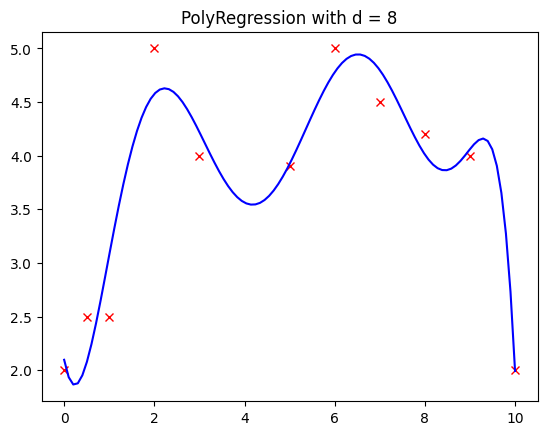

In [ ]:
'''
    TEST SCRIPT FOR POLYNOMIAL REGRESSION 1
    AUTHOR Eric Eaton, Xiaoxiang Hu
'''

import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "/content/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, 0]
    y = allData[:, 1]

    # regression with degree = d
    d = 8
    model = PolynomialRegression(degree = d, reg_Lambda = 0)
    model.fit(X, y)

    # output predictions
    xpoints = np.linspace(np.max(X), np.min(X), 100).T
    ypoints = model.predict(xpoints)

    # plot curve
    plt.figure()
    plt.plot(X, y, 'rx')
    plt.title('PolyRegression with d = '+str(d))
    #plt.plot(xpoints, ypoints, 'b-')
    if xpoints is not None and ypoints is not None:
      plt.plot(xpoints, ypoints, 'b-')
      plt.show()
    else:
      print("xpoints or ypoints is None, cannot plot.")




test_polyreg_learningCurve

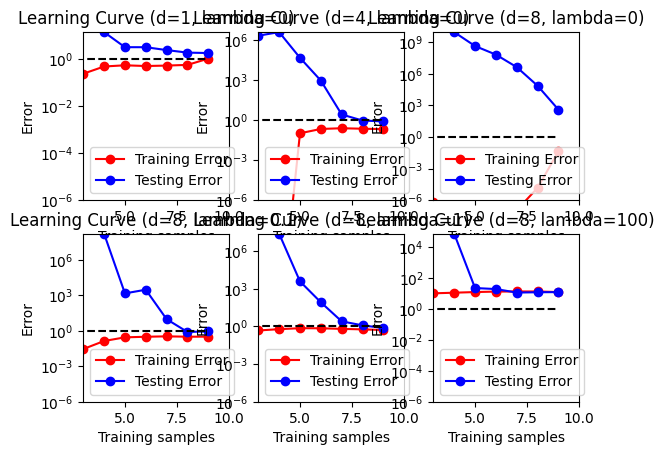

In [ ]:
'''
    TEST SCRIPT FOR POLYNOMIAL REGRESSION 1
    AUTHOR Eric Eaton, Xiaoxiang Hu
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
#from sklearn import cross_validation
#from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn import model_selection



#----------------------------------------------------
# Plotting tools

def plotLearningCurve(errorTrain, errorTest, regLambda, degree):
    '''
        plot computed learning curve
    '''
    minX = 3
    maxY = max(errorTest[minX+1:])

    xs = np.arange(len(errorTrain))
    plt.plot(xs, errorTrain, 'r-o')

    plt.plot(xs, errorTest, 'b-o')
    plt.plot(xs, np.ones(len(xs)), 'k--')

    plt.legend(['Training Error', 'Testing Error'], loc = 'best')
    plt.title('Learning Curve (d='+str(degree)+', lambda='+str(regLambda)+')')
    plt.xlabel('Training samples')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.ylim((1E-6, maxY))  # Use a small positive value as the lower limit
    plt.xlim((minX,10))


def generateLearningCurve(X, y, degree, reg_Lambda):
    '''
        computing learning curve via leave one out CV
    '''

    n = len(X);

    errorTrains = np.zeros((n, n-1));
    errorTests = np.zeros((n, n-1));

    loo = model_selection.LeaveOneOut()
    itrial = 0
    for train_index, test_index in loo.split(X):
        #print("TRAIN indices:", train_index, "TEST indices:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        (errTrain, errTest) = learningCurve(X_train, y_train, X_test, y_test, reg_Lambda, degree)

        errorTrains[itrial, :] = errTrain
        errorTests[itrial, :] = errTest
        itrial = itrial + 1

    errorTrain = errorTrains.mean(axis = 0)
    errorTest = errorTests.mean(axis = 0)

    plotLearningCurve(errorTrain, errorTest, reg_Lambda, degree)




#-----------------------------------------------

if __name__ == "__main__":
    '''
        Main function to test polynomial regression
    '''

    # load the data
    filePath = "/content/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, 0]
    y = allData[:, 1]

    # generate Learning curves for different params
    plt.subplot(2, 3, 1)
    generateLearningCurve(X, y, 1, 0);
    plt.subplot(2, 3, 2)
    generateLearningCurve(X, y, 4, 0);
    plt.subplot(2, 3, 3)
    generateLearningCurve(X, y, 8, 0);
    plt.subplot(2, 3, 4)
    generateLearningCurve(X, y, 8, .1);
    plt.subplot(2, 3, 5)
    generateLearningCurve(X, y, 8, 1);
    plt.subplot(2, 3, 6)
    generateLearningCurve(X, y, 8, 100);
    plt.show()
